In [4]:
# Deep learning related imports
import torch
from PyTorchGat.utils.data_loading import *
from PyTorchGat.utils.visualizations import * 
from PyTorchGat.utils.constants import * 

ModuleNotFoundError: No module named 'torch'

In [ ]:
PPI_NUM_INPUT_FEATURES = 50
PPI_NUM_CLASSES = 121

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # checking whether you have a GPU

config = {
    'dataset_name': DatasetType.PPI.name,
    'num_of_epochs': 200,
    'patience_period': 100,
    
    'should_visualize': False,
    'batch_size': 1,
    'force_cpu': False,
    'should_test': True,
    'console_log_freq': 10,
    'checkpoint_freq': 5,
    'enable_tensorboard': True,
    'weight_decay': 0,
    'ppi_load_test_only': False,
    
    'lr': 5e-3,
    'num_of_layers': 3,  # PPI has got 42% of nodes with all 0 features - that's why 3 layers are useful
    'num_heads_per_layer': [4, 4, 6],  # other values may give even better results from the reported ones
    'num_features_per_layer': [PPI_NUM_INPUT_FEATURES, 256, 256, PPI_NUM_CLASSES],  # 64 would also give ~0.975 uF1!
    'add_skip_connection': True,  # skip connection is very important! (keep it otherwise micro-F1 is almost 0)
    'bias': True,  # bias doesn't matter that much
    'dropout': 0.0,  # dropout hurts the performance (best to keep it at 0)
    'layer_type': LayerType.IMP3,  # the only implementation that supports the inductive setting
    
    'neighbourhood_degree': 2,
    'adjacency_mode': AdjacencyMode.OneStep
}

print("Cuda is available:", torch.cuda.is_available())

Cuda is available: True


In [ ]:
data_loader_train, data_loader_val, data_loader_test = load_graph_data(config, device)
# Let's fetch a single batch from the train graph data loader
node_features, node_labels, edge_index = next(iter(data_loader_train))

print('*' * 20)
print(node_features.shape, node_features.dtype)
print(node_labels.shape, node_labels.dtype)
print(edge_index.shape, edge_index.dtype)


Elapsed time: 0.1735084056854248
Loading train graph 1 to CPU. It has 1767 nodes and 2080871 edges.
Elapsed time: 0.08900928497314453
Loading train graph 2 to CPU. It has 1377 nodes and 1653567 edges.
Elapsed time: 0.3605039119720459
Loading train graph 3 to CPU. It has 2263 nodes and 4545525 edges.
Elapsed time: 0.3052084445953369
Loading train graph 4 to CPU. It has 2339 nodes and 4938591 edges.
Elapsed time: 0.11386656761169434
Loading train graph 5 to CPU. It has 1578 nodes and 2239576 edges.
Elapsed time: 0.04816389083862305
Loading train graph 6 to CPU. It has 1021 nodes and 907565 edges.
Elapsed time: 0.16868376731872559
Loading train graph 7 to CPU. It has 1823 nodes and 2988103 edges.
Elapsed time: 0.36438512802124023
Loading train graph 8 to CPU. It has 2488 nodes and 5566628 edges.
Elapsed time: 0.011543035507202148
Loading train graph 9 to CPU. It has 591 nodes and 280303 edges.
Elapsed time: 0.7442264556884766
Loading train graph 10 to CPU. It has 3312 nodes and 9833886 ed

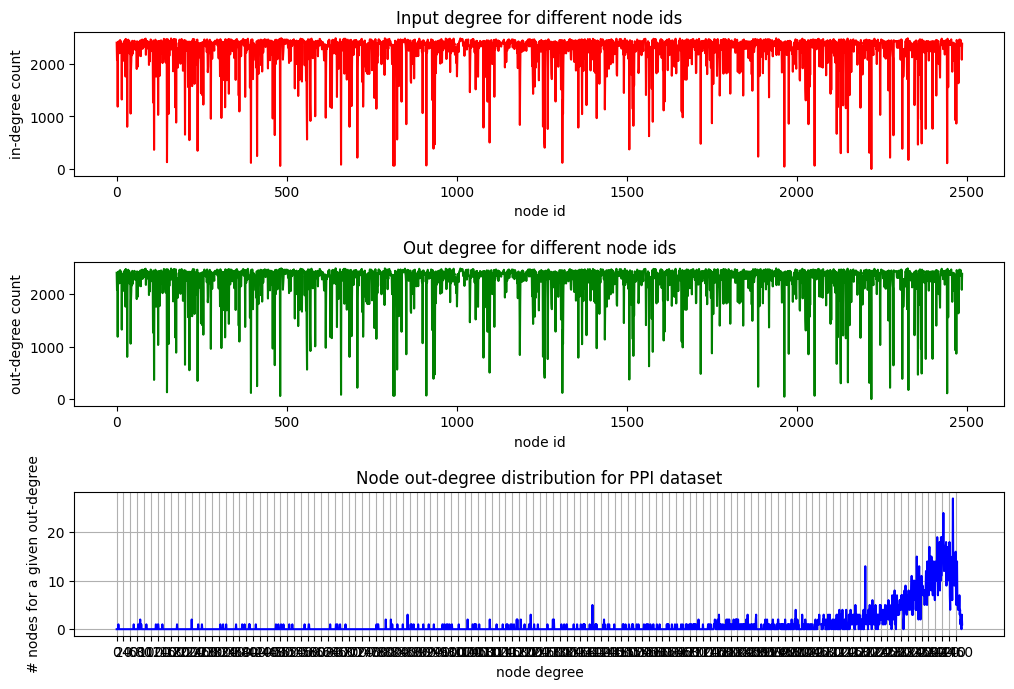

In [ ]:
num_of_nodes = len(node_labels)
plot_in_out_degree_distributions(edge_index, num_of_nodes, config['dataset_name'], 'DegreeDistributionN_' + str(config['neighbourhood_degree']) + '.jpg')

In [ ]:
from Scripts.script_PPI import * 

train_gat_ppi(config)

Elapsed time: 0.20819425582885742


KeyboardInterrupt: 